# 

# Scikit-Learn – Solution

## Exploration de données et classification

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)

%config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # 1.0.2

1.0.2


---

### Exploration avec pandas

#### Créez la dataframe

https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset


Descripteurs (features) :

* `CRIM`: taux de criminalité par habitant par ville
* `ZN`: proportion de terrains résidentiels zonés pour les lots de plus de 25 000 pi.ca.
* `INDUS`: proportion d'acres commerciaux/non-commerciaux par ville
* `CHAS`: variable fictive de Charles River (= 1 si la zone délimite la rivière; 0 sinon)
* `NOX`: concentration d'oxydes nitriques (parties par 10 millions)
* `RM`: nombre moyen de pièces par logement
* `AGE`: proportion de logements occupés par leur propriétaire construits avant 1940
* `DIS`: distances pondérées des cinq centres d'emploi de Boston
* `RAD`: indice d'accessibilité aux autoroutes radiales
* `TAX`: taux d'imposition foncière de la valeur totale par tranche de 10 000 $
* `PTRATIO`: ratio élèves-enseignant par ville
* `B`: 1000(A - 0.63)^2 où A est la proportion d'habitants afro-américains par ville
* `LSTAT`: pourcentage d'habitant en dessous du seuil de pauvreté

Cible (target) :

* `MEDV`: Valeur médiane des logements occupés par leur propriétaire en 1 000 $

In [2]:
boston = datasets.load_boston()
# print(boston.DESCR)

C:\Users\mesba\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
# adding all the features to data frame
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target
boston_df  # final data in dataframe format

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Descriptions

In [4]:
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [5]:
boston_df.describe().style.format("{:.3g}")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,3.61,11.4,11.1,0.0692,0.555,6.28,68.6,3.8,9.55,408,18.5,357,12.7,22.5
std,8.6,23.3,6.86,0.254,0.116,0.703,28.1,2.11,8.71,169,2.16,91.3,7.14,9.2
min,0.00632,0,0.46,0,0.385,3.56,2.9,1.13,1,187,12.6,0.32,1.73,5
25%,0.082,0,5.19,0,0.449,5.89,45,2.1,4,279,17.4,375,6.95,17
50%,0.257,0,9.69,0,0.538,6.21,77.5,3.21,5,330,19.1,391,11.4,21.2
75%,3.68,12.5,18.1,0,0.624,6.62,94.1,5.19,24,666,20.2,396,17,25
max,89,100,27.7,1,0.871,8.78,100,12.1,24,711,22,397,38,50


#### Corrélations

On peut faire très rapidement un tableau des corrélations avec toutes les données via [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [6]:
corr_df = boston_df.corr()

corr_df.style.format("{:.2g}")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


La methode [`DataFrame.style.Styler.background_gradient`](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html) permet de représenter le `DataFrame` en *heatmap*.

Dans ce cas, il est important de prendre une double coloration (ici positive en vert et négative en rose) pour mettre en évidence à la fois la valeur absolue des corrélations et leur polarité.

In [7]:
corr_df.style.background_gradient(cmap="PiYG", vmin=-1).format("{:.2g}")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


#### Graphiques dans pandas

Il est possible de construire des graphiques très facilement à partir des `DataFrame` de pandas qui offrent un accès à l'API de Matplotlib, comme par exemple avec la méthode [`DataFrame.hist`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).

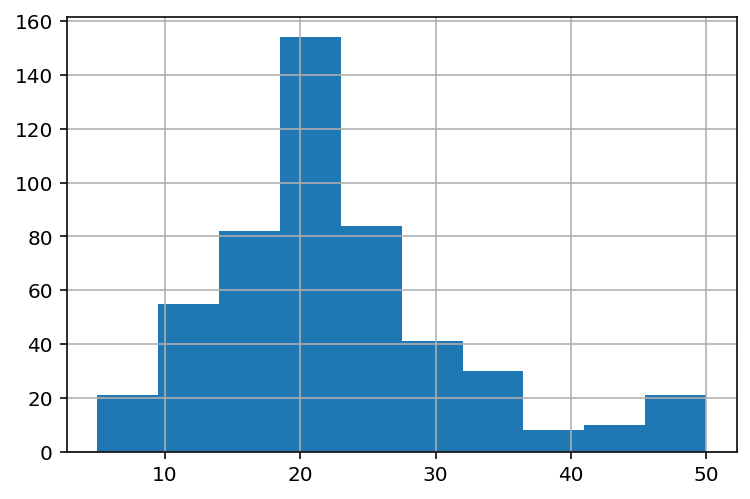

In [8]:
boston_df["PRICE"].hist()
plt.show()

Par défaut, l'histogramme est divisé en 10 paniers (*bins*). On peut voir que le choix du nombre de paniers influence grandement la forme des histogrammes.

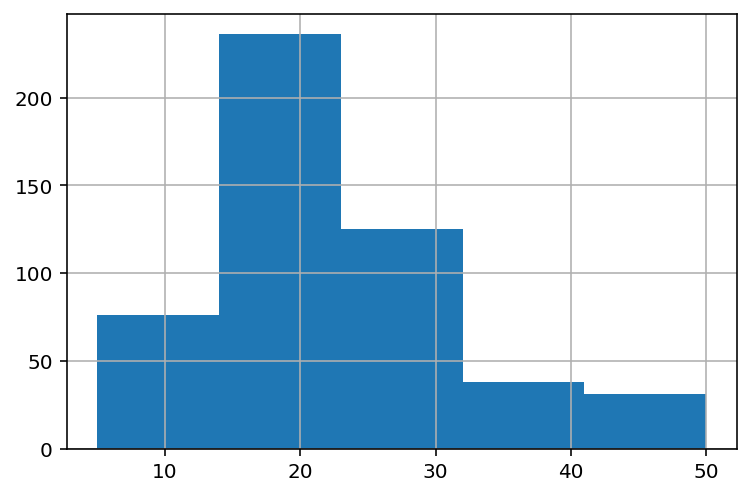

In [9]:
boston_df["PRICE"].hist(bins=5)
plt.show()

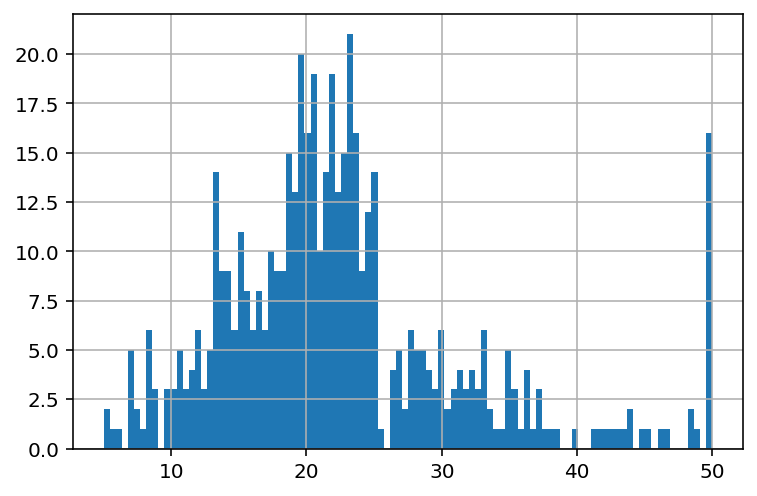

In [10]:
boston_df["PRICE"].hist(bins=100)
plt.show()

#### Scatter matrix

Une autre façon de visualiser la corrélation entre des descripteurs est via la fonction [`pandas.plotting.scatter_matrix`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) de pandas, qui trace chaque descripteur numérique par rapport à chaque autre descripteur numérique. 

Comme on a 13 descripteurs numériques, vous obtiendrez $13 \times 13 = 169$ figures, ce qui ne serait pas lisible sur une page, alors concentrons-nous simplement sur quelques-uns d'entre eux.

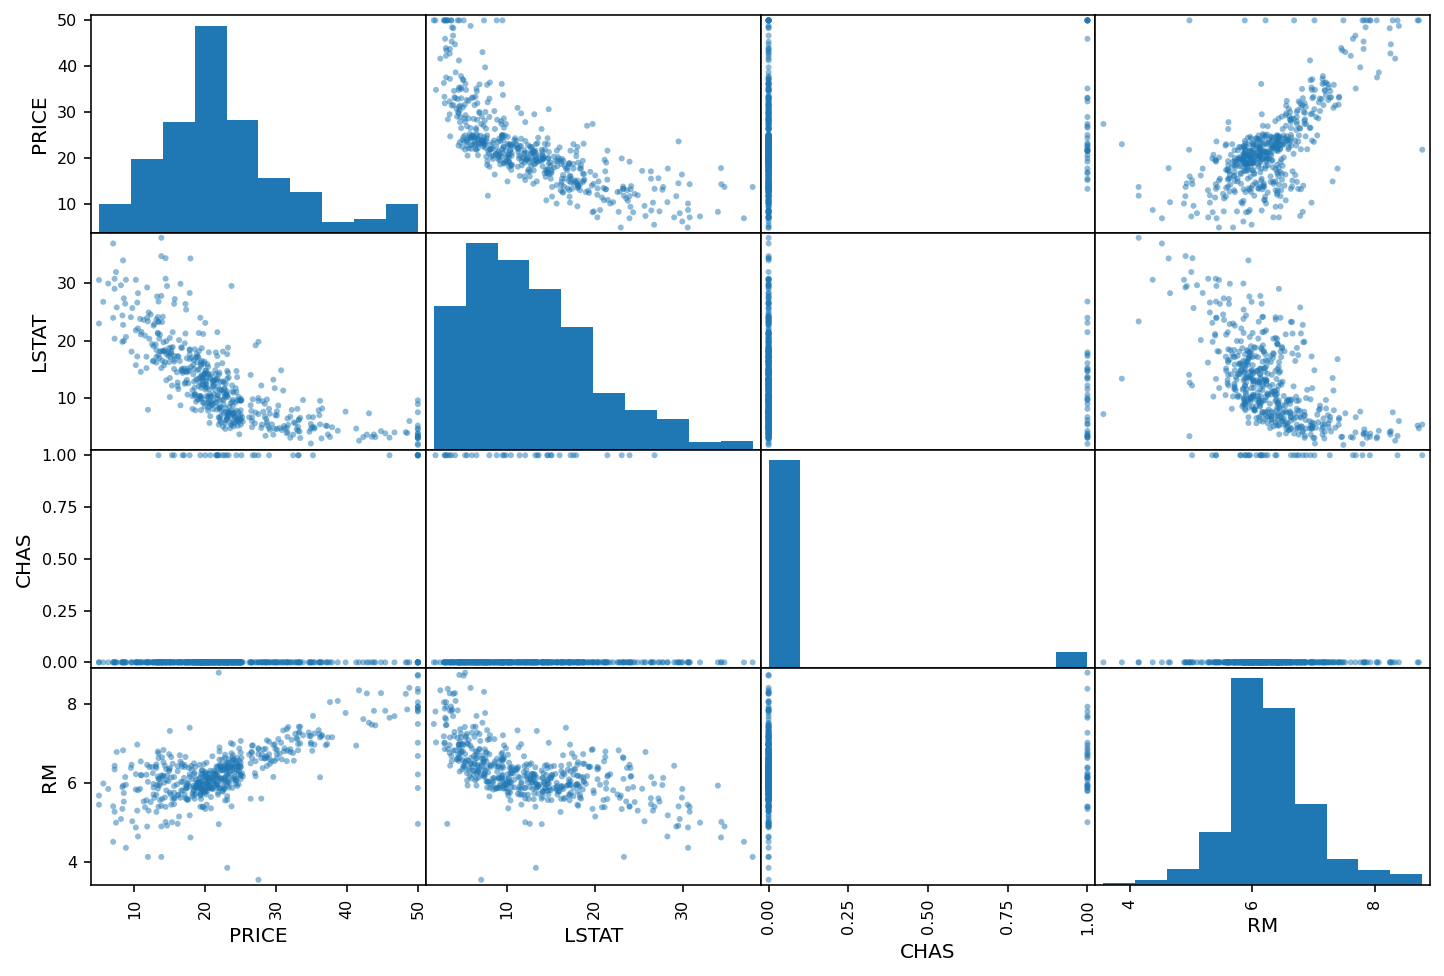

In [11]:
FTS = ["PRICE", "LSTAT", "CHAS", "RM"]
pd.plotting.scatter_matrix(boston_df[FTS], figsize=(12, 8))
plt.show()

On peut voir les corrélations positives et négatives avec PRICE, et celles peu corrélées (en l'occurence CHAS, la proximité de la rivière, qui est une variable binaire).

---

### Classification (digits)

On va regarder la classification en terme de précision et rappel (et non-plus uniquement en terme d'accuracy).

#### Chargement des données

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [12]:
digits = datasets.load_digits()

In [13]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

xs = digits.images.reshape([n_samples, -1])
ys = digits.target

print(xs.shape, ys.shape)

(1797, 8, 8)
(1797, 64) (1797,)


Sélectionnez de manière aléatoire le dataset d'entrainement et de test (via la fonction [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [14]:
xs_train, xs_test, ys_train, ys_test = model_selection.train_test_split(
    xs, ys, random_state=1
)

print(ys_train.shape, xs_train.shape)
print(ys_test.shape, xs_test.shape)

(1347,) (1347, 64)
(450,) (450, 64)


#### Entrainement des modèles

Entrainez le modèle avec l'algorithme de classification [Naive Bayes avec le noyau Gaussien](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [15]:
# 2. Instantiaiton
model = naive_bayes.GaussianNB()

# 3. Apprentissage (fit) du model
model.fit(xs_train, ys_train)

# 4. Prédire sur les données de test
ys_pred = model.predict(xs_test)

#### Évaluation

Évaluez avec l'[`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Puis donnez une résultats plus complet, incluant précision, rappel est et f1-score avec la fonction [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [16]:
score = metrics.accuracy_score(ys_test, ys_pred)

print(f"{score :.4f}")

0.8533


In [17]:
print(metrics.classification_report(ys_test, ys_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.81      0.81      0.81        42
           2       0.93      0.66      0.77        41
           3       0.93      0.77      0.84        52
           4       0.93      0.91      0.92        47
           5       0.94      0.85      0.89        39
           6       0.96      1.00      0.98        43
           7       0.80      1.00      0.89        48
           8       0.51      0.95      0.67        37
           9       1.00      0.62      0.77        48

    accuracy                           0.85       450
   macro avg       0.88      0.85      0.85       450
weighted avg       0.89      0.85      0.86       450



In [18]:
scores_dic = metrics.classification_report(ys_test, ys_pred, output_dict=True)
scores_df = pd.DataFrame(scores_dic).transpose()

scores_df.style.format("{:.2g}")

,precision,recall,f1-score,support
0,0.98,0.96,0.97,53
1,0.81,0.81,0.81,42
2,0.93,0.66,0.77,41
3,0.93,0.77,0.84,52
4,0.93,0.91,0.92,47
5,0.94,0.85,0.89,39
6,0.96,1,0.98,43
7,0.8,1,0.89,48
8,0.51,0.95,0.67,37
9,1,0.62,0.77,48


In [19]:
scores_df[["precision"]].style.format("{:.2g}")

,precision
0,0.98
1,0.81
2,0.93
3,0.93
4,0.93
5,0.94
6,0.96
7,0.8
8,0.51
9,1


#### Matrice de confusion

Utiliser la class de scikit-learn [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)
pour afficher la matrice de confusion.

Commentez succinctement les résultats.

Notez que l'attribut `.confusion_matrix` de l'objet retourné par la fonction permet d'obtenir la matrice de confusion sous forme d'array.

<span style="color:red">Implémentez votre solution ci-dessous</span>

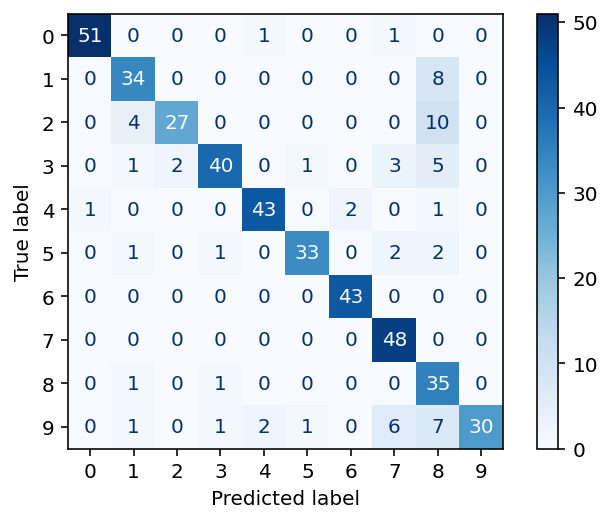

In [20]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    ys_test, ys_pred, cmap=plt.cm.Blues
)

In [21]:
disp.confusion_matrix

array([[51,  0,  0,  0,  1,  0,  0,  1,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  4, 27,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  1,  2, 40,  0,  1,  0,  3,  5,  0],
       [ 1,  0,  0,  0, 43,  0,  2,  0,  1,  0],
       [ 0,  1,  0,  1,  0, 33,  0,  2,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 35,  0],
       [ 0,  1,  0,  1,  2,  1,  0,  6,  7, 30]], dtype=int64)

#### Visualisation des erreurs

Identifiez les cas les plus confus.

Identifiez les instances mal classées pour la classe de chiffre au f1-score le plus faible et visualisez les avec le code ci-dessous.

Vous pouvez utiliser la fonction [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) pour trouver l'index des instances en question.

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [22]:
np.where(ys_test == 2)

(array([ 11,  34,  46,  60,  76,  80,  87,  89,  90,  91,  92,  99, 102,
        106, 109, 111, 117, 154, 155, 156, 175, 182, 194, 218, 233, 240,
        241, 272, 284, 288, 293, 298, 313, 314, 338, 358, 364, 373, 392,
        396, 433], dtype=int64),)

In [23]:
(indexes,) = np.where((ys_test == 2) & (ys_pred == 8))
indexes

array([ 11,  60,  99, 106, 109, 233, 284, 298, 313, 396], dtype=int64)

In [24]:
def plot_digit(idx, xs_test, ys_test, ys_pred):
    print(f"Digit value: {ys_test[idx]}, prediction: {ys_pred[idx]}")

    plt.figure(figsize=(3, 3))
    plt.imshow(
        xs_test[idx].reshape([8, 8]),
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )

Digit value: 2, prediction: 8


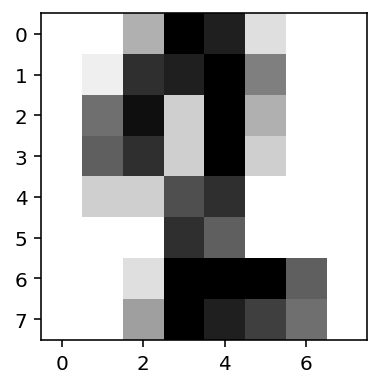

In [25]:
plot_digit(99, xs_test, ys_test, ys_pred)

---

### PCA

Utilisez une compression des dimensions par ACP ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), en utilisant 10 composantes principales.

#### Initialisation des PCA et sélection des données

In [26]:
N_COMP = 10

pca = decomposition.PCA(n_components=N_COMP)
xps_train = pca.fit_transform(xs_train)
xps_test = pca.transform(xs_test)

print(xs_train.shape, xs_test.shape)
print(xps_train.shape, xps_test.shape)

(1347, 64) (450, 64)
(1347, 10) (450, 10)


#### Entrainement des modèles

In [27]:
# 2. Instantiaiton
model_pca = naive_bayes.GaussianNB()
# model_pca = linear_model.LogisticRegression(max_iter=2000)

# 3. Apprentissage (fit) du model
model_pca.fit(xps_train, ys_train)

# 4. Prédire sur les données de test
yps_pred = model_pca.predict(xps_test)

#### Évaluation

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [28]:
score = metrics.accuracy_score(ys_test, yps_pred)
print(f"{score :.04f}")

0.9111


In [29]:
print(metrics.classification_report(ys_test, yps_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.73      0.88      0.80        42
           2       0.95      0.85      0.90        41
           3       0.96      0.83      0.89        52
           4       0.98      1.00      0.99        47
           5       0.88      0.95      0.91        39
           6       1.00      1.00      1.00        43
           7       0.90      0.96      0.93        48
           8       0.86      0.81      0.83        37
           9       0.88      0.88      0.88        48

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.92      0.91      0.91       450



---

### Cross-Validation

![](img/grid_search_cross_validation.png)

#### Chargement des données

Utilisez la fonction [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) pour implémenter la cross-validation.

Vous choisirez de faire 10 splits (`cv=10`).

Choisissez comme *scoring* `"f1_weighted"`, la fonction retournera alors les scores correspondants dans une array.

À titre d'exemple et pour pouvoir comparer les résultats avec les précédents, la première application se fera sur l'entièreté du dataset (ce qui n'est normalement pas recommandé).

<span style="color:red">Implémentez votre solution ci-dessous</span>

In [30]:
SCORINGS = "f1_weighted"

In [31]:
N_COMP = 10

pca = decomposition.PCA(n_components=N_COMP)
model = naive_bayes.GaussianNB()

pipe = pipeline.Pipeline(steps=[("pca", pca), ("model", model)])

scores = model_selection.cross_val_score(pipe, xs, ys, cv=10, scoring=SCORINGS)

with np.printoptions(precision=2):
    print(scores)

print(f"\n{SCORINGS}: {scores.mean():.2f}, with std dev: {scores.std():.2f}\n")

[0.88 0.92 0.89 0.87 0.89 0.9  0.93 0.96 0.84 0.87]

f1_weighted: 0.89, with std dev: 0.03



Montrez les résultats avec un [`plt.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) qui inclus une barre d'erreur `yerr` égale à 2 $\times$ l'[déviation standard](https://numpy.org/doc/stable/reference/generated/numpy.std.html), ainsi que dans un [`boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

Notez que la moyenne et la déviation standard peuvent être obtenues également par une méthode (homonyme) de l'array.

<span style="color:red">Implémentez votre solution ci-dessous</span>

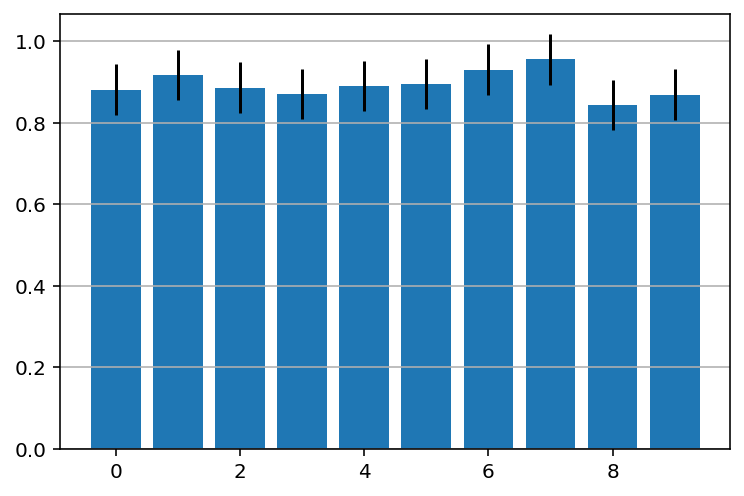

In [32]:
plt.bar(range(len(scores)), scores, yerr=2 * scores.std())
plt.grid(axis="y")
plt.show()

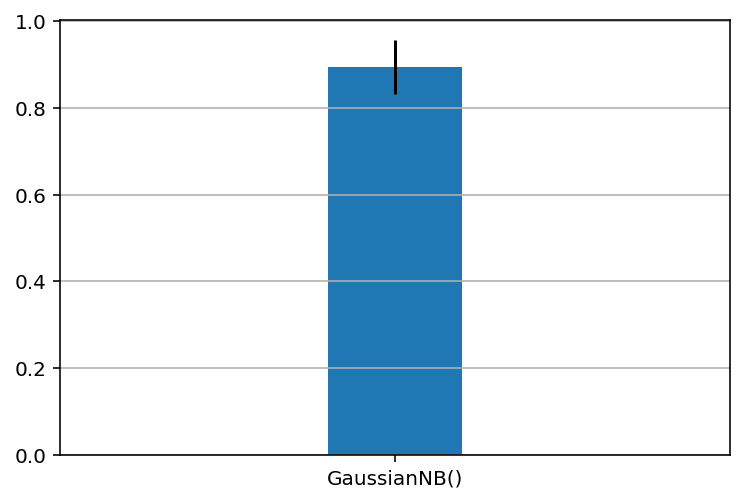

In [33]:
plt.bar([str(model)], scores.mean(), yerr=2 * scores.std())
plt.xlim(-2, 2)
plt.grid(axis="y")
plt.show()

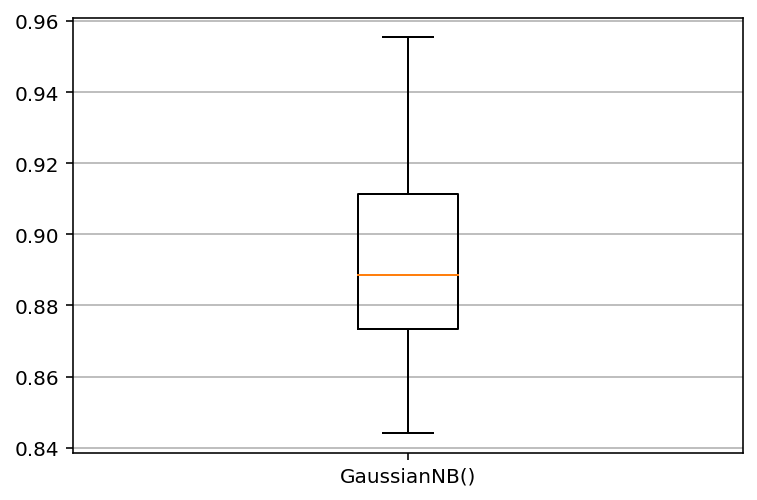

(10,)

In [42]:
plt.boxplot(scores)
plt.xticks([1], [str(model)])
plt.grid(axis="y")
plt.show()
scores.shape

---

### Grid Search

Cette fois, nous allons utiliser la validation croisée pour sa raison première : valider le choix d'hyperparamètres.

Nous allons utiliser la classe
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) pour choisir le meilleur nombre de composante principale pour la PCA.

Cette classe permet de tester plusieurs paramètres (à entrer dans un dictionnaire) et à les tester via cross-validation (d'où le CV dans le nom).

Pour ce faire, nous n'avons plus besoin de nous occuper de créer les différents subsets, la classe `GridSearchCV` s'en charge pour nous.

In [35]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

Nous allons utiliser un [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) pour effectuer la compression PCA et l'apprentissage avec le modèle conjointement, ce qui va nous permettre de modifier les hyperparamètres à toutes les étapes en une seule commande.

Nous devrons utiliser les noms exacts des hyperparamètres à modifier dans le dictionnaire, précédés du nom du module et d'un double *underscore* (ici: `"pca__"`), pour pouvoir les assigner à la bonne étape du `pipeline`.

In [36]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

pca = decomposition.PCA()
model = naive_bayes.GaussianNB()

pipe = pipeline.Pipeline(steps=[("pca", pca), ("model", model)])

In [37]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:

search = model_selection.GridSearchCV(
    pipe, param_grid, n_jobs=-1, scoring=SCORINGS, verbose=4, cv=10
)

search.fit(xs, ys)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [1, 2, 5, 10, 20, 30, 40, 60]},
             scoring='f1_weighted', verbose=4)

In [38]:
print(f"Best parameter (CV score: {search.best_score_:.3f})")

print(search.best_params_)

Best parameter (CV score: 0.915)
{'pca__n_components': 30}


In [39]:
cv_results_df = pd.DataFrame(search.cv_results_).drop(columns="params")

cv_results_df.style.format("{:.2g}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027,0.0034,0.0049,0.0018,1,0.3,0.37,0.25,0.28,0.32,0.28,0.36,0.3,0.3,0.28,0.3,0.036,8
1,0.026,0.0029,0.0049,0.00083,2,0.54,0.68,0.59,0.64,0.66,0.59,0.62,0.57,0.58,0.58,0.6,0.042,7
2,0.032,0.004,0.0046,0.001,5,0.83,0.88,0.79,0.82,0.84,0.77,0.83,0.83,0.75,0.84,0.82,0.035,6
3,0.025,0.0012,0.0055,0.0013,10,0.88,0.92,0.89,0.87,0.89,0.9,0.93,0.96,0.84,0.87,0.89,0.031,4
4,0.034,0.0042,0.0054,0.0016,20,0.88,0.95,0.89,0.9,0.89,0.91,0.96,0.97,0.85,0.91,0.91,0.035,3
5,0.057,0.0099,0.0058,0.0015,30,0.89,0.94,0.9,0.92,0.89,0.91,0.97,0.97,0.85,0.9,0.92,0.036,1
6,0.067,0.0077,0.0088,0.0079,40,0.88,0.92,0.91,0.93,0.89,0.91,0.97,0.94,0.87,0.9,0.91,0.028,2
7,0.033,0.009,0.0063,0.0018,60,0.87,0.9,0.88,0.75,0.82,0.85,0.92,0.94,0.8,0.85,0.86,0.056,5


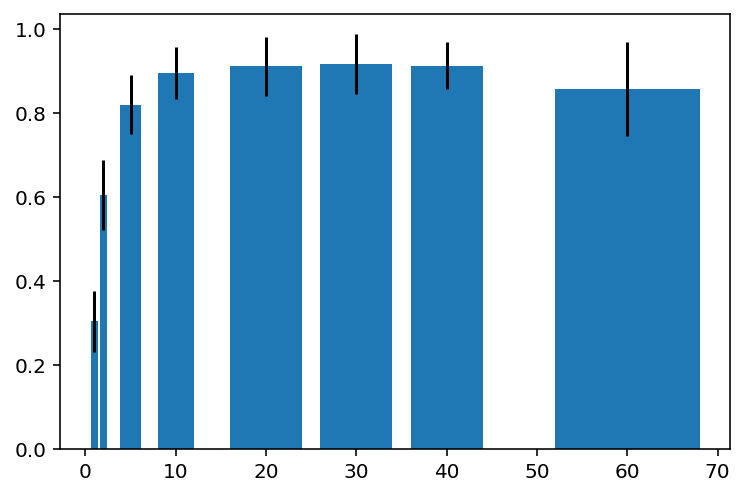

In [40]:
plt.bar(
    cv_results_df["param_pca__n_components"],
    cv_results_df["mean_test_score"],
    yerr=2 * cv_results_df["std_test_score"],
    width=0.8 * np.diff(cv_results_df["param_pca__n_components"], prepend=0),
)
plt.show()

## Exercice (optionnel)

En utilisant la méthode `.predict_proba` de `linear_model.LogisticRegression`, utiliser le résultat de la prédiction pour sélectionner un seuil (*threshold*) particulier pour influencer la classification.

* Pouvez-vous obtenir 100 % de [précision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) ?
* Pouvez-vous obtenir 100 % de [rappel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) ?
* Mesurez les valeurs de [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) et commentez.
* Tracez la [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) à partir de plusieurs valeurs de seuil.
* Comparez les [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (aire sous la courbe ROC) de la `linear_model.LogisticRegression` et de `naive_bayes.GaussianNB()`.

---